# 원리

1. 각 포인트를 하나의 클러스터로 지정
2. `linkage` 파라미터에 지정된 방법으로 가장 비슷한 두 클러스터를 병합
    * `ward` : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스트를 합침
    * `average` : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침
    * `complete` : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스를 합침
    * `single` : 클러스터 포인트 사이의 최소 거리가 가장 짧은 두 클러스터를 합침
3. 종료조건이 만족할때까지 2를 반복

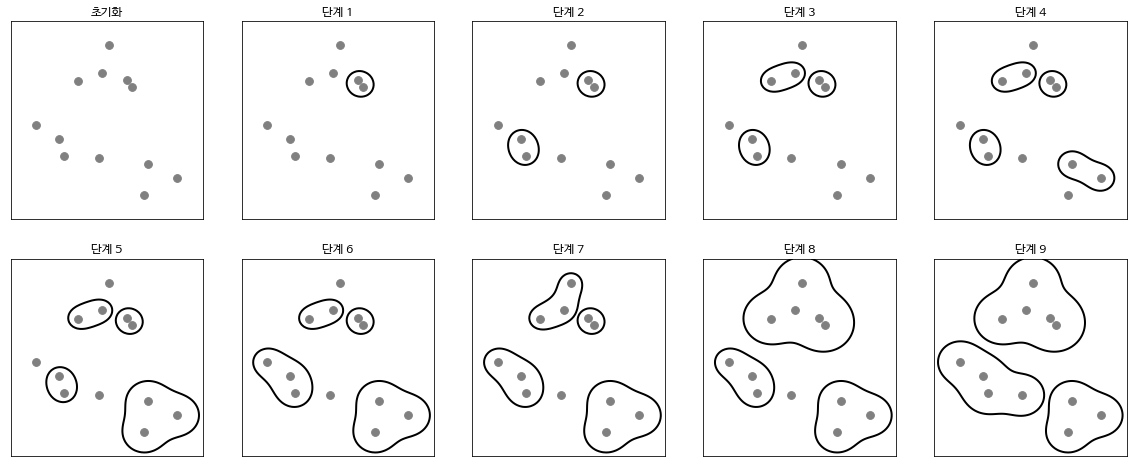

In [1]:
from ml1.preamble import*
mglearn.plots.plot_agglomerative_algorithm()

# 코드

* 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없으므로 predict 메서드가 없음

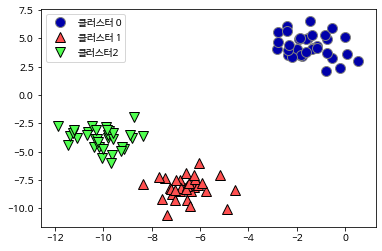

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터2'])
plt.show()

# 덴드로그램

* scipy로 시각화 가능

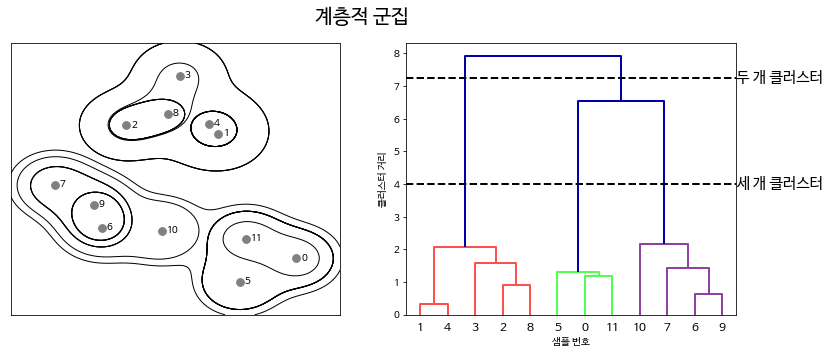

In [3]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(n_samples=12, random_state=0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('계층적 군집', fontsize=20)

plt.sca(ax1)
mglearn.plots.plot_agglomerative()

linkage_array = ward(X)
dendrogram(linkage_array, ax=ax2)

xlim = ax2.get_xlim()
ax2.plot(xlim, [7.25, 7.25], '--k', xlim, [4, 4], '--k')
ax2.text(xlim[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax2.text(xlim[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
ax2.set_xlabel('샘플 번호')
ax2.set_ylabel('클러스터 거리')
plt.show()

=> 가지는 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여줌

# 한계

* 복잡한 형상을 구분하지 못함

Text(0.5, 1.0, '병합 군집')

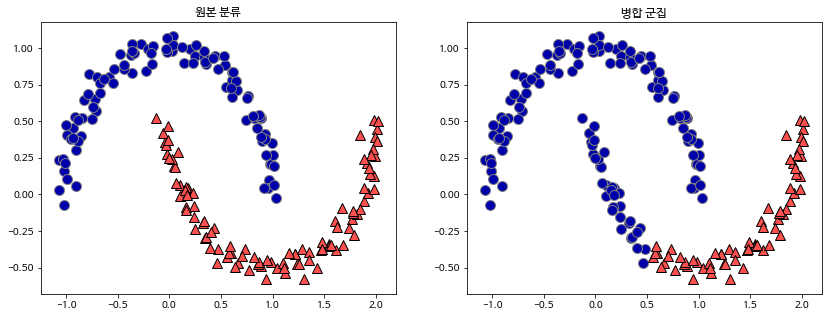

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(random_state=0, n_samples=200, noise=0.05)
y_agg = AgglomerativeClustering(n_clusters=2).fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax1)
ax1.set_title('원본 분류')

mglearn.discrete_scatter(X[:,0], X[:,1], y_agg, ax=ax2)
ax2.set_title('병합 군집')